In [97]:
import os
import numpy as np
import pandas as pd
import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [63]:
hparam_values = {"conv_f": 3,
                "conv1_out_depth": 10,
                "conv2_out_depth": 16,
                "fc1_out": 120,
                "fc2_out": 84,
                "lr": -2,
                "momentum": -0.05} #hparams for the first iteration, to help with search

# Load optimisation results 

In [76]:
query_arr = []
observation_arr = []

stored_results = [item for item in os.listdir("./optimisation_results/")]
time_stamps = [float("".join(item.split("_")[:2])) for item in stored_results] 
last_result = stored_results[np.argmax(time_stamps)]
df = pd.read_pickle("./optimisation_results/"+last_result)

for index, row in df.iterrows():
    query_i_dict = row.drop("acc").to_dict()
    query_i_arr = list(query_i_dict.values())
    observation_i = df.loc[index, "acc"]

    #optimizer.register(params = query_i_dict, target = observation_i)

    query_arr.append(query_i_arr)
    observation_arr.append(observation_i)

    
print(last_result)
df_optimisation = pd.DataFrame(data = query_arr, columns = hparam_values.keys())
df_optimisation["acc"] = observation_arr

cols = df_optimisation.columns.values[:5]
for col in cols:
    df_optimisation[col] = round(df_optimisation[col])

20221128_110821_results


In [77]:
df_optimisation

,conv_f,conv1_out_depth,conv2_out_depth,fc1_out,fc2_out,lr,momentum,acc
0,3.0,10.0,16.0,120.0,84.0,-2.000000,-0.050000,74.95
1,6.0,10.0,15.0,52.0,190.0,0.000412,0.001972,10.00
2,4.0,13.0,10.0,114.0,61.0,0.000195,0.051410,10.55
3,2.0,14.0,6.0,129.0,54.0,0.003826,0.000383,10.55
4,2.0,1.0,3.0,86.0,67.0,0.043806,0.006345,11.50
...,...,...,...,...,...,...,...,...
1407,5.0,3.0,3.0,118.0,118.0,-1.718089,-3.702645,12.60
1408,8.0,12.0,5.0,71.0,183.0,-1.000000,-2.581600,91.50
1409,16.0,12.0,1.0,193.0,165.0,-2.274387,-2.562301,11.50
1410,15.0,14.0,3.0,193.0,163.0,-1.884142,-2.905788,15.35


In [66]:
idx_max = df_optimisation.acc.argmax()
df_optimisation.iloc[idx_max]

conv_f              19.002816
conv1_out_depth      6.169359
conv2_out_depth      8.831611
fc1_out            186.601338
fc2_out             81.954669
lr                  -1.067793
momentum            -3.298958
acc                 99.400000
Name: 1395, dtype: float64

<AxesSubplot:>

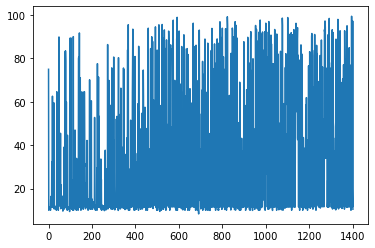

In [69]:
df_optimisation.acc.plot()

## Show some of the top performing CNN configurations

In [112]:
df_optimisation.sort_values(by = "acc", ascending=False, inplace=True)
df_optimisation.head(20)

,conv_f,conv1_out_depth,conv2_out_depth,fc1_out,fc2_out,lr,momentum,acc
1395,19.0,6.0,9.0,187.0,82.0,-1.067793,-3.298958,99.40
823,13.0,12.0,9.0,187.0,160.0,-1.283457,-3.622337,99.15
592,19.0,16.0,9.0,48.0,95.0,-1.221901,-3.551631,98.90
1101,15.0,16.0,9.0,184.0,165.0,-1.232466,-2.716221,98.80
1076,14.0,14.0,9.0,191.0,117.0,-1.292019,-1.079094,98.55
1292,15.0,13.0,9.0,190.0,159.0,-1.170784,-2.039232,98.40
1332,15.0,12.0,7.0,188.0,162.0,-1.000000,-1.862660,97.95
974,19.0,15.0,6.0,189.0,165.0,-1.049124,-3.348146,97.65
574,15.0,13.0,7.0,185.0,165.0,-1.039322,-2.458057,97.60
1400,7.0,16.0,7.0,166.0,101.0,-1.000000,-2.325208,97.20


### PCA analysis of optimisation

In [118]:
X = df_optimisation.drop(columns = ["acc"]).transpose().to_numpy()
y = df_optimisation.acc.to_numpy()

z = StandardScaler().fit_transform(np.transpose(X))
pca = PCA(n_components=3)
pca_arr = pca.fit_transform(z)

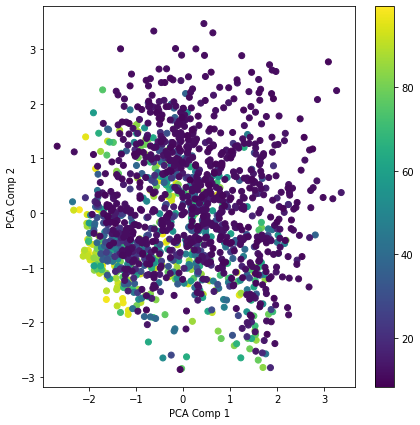

In [119]:
plt.figure(figsize = (7,7))
plt.scatter(pca_arr[:, 0], pca_arr[:, 1], c=y)
plt.colorbar()
plt.xlabel("PCA Comp 1", )
plt.ylabel("PCA Comp 2", )
plt.show()

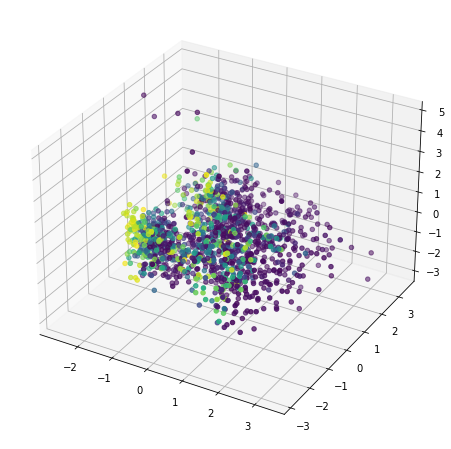

In [122]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_arr[:,0], pca_arr[:,1], pca_arr[:,2], c=y)
plt.show()